# Título:
Agrupación de jugadores en base a sus características para la tesis de Luciana Affinito

### ANALISIS EXPLORATORIO DE LOS DATOS

En este apartado exploraremos los datos para poder observar sus características.

In [1]:
#importamos las librerias necesarias
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
import numpy as np
import seaborn as sea

In [2]:
#Cargamos el dataset y mostramos algunos datos para ver la estructura de los mismos
df=pd.read_csv('Tabla_Jugador.csv',sep=';',decimal=',')
df.head()

,full_name,age,league,season,position,Current Club,minutes_played_overall,nationality,appearances_overall,goals_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
0,Aarón Escandell Banacloche,26,La Liga,2021/2022,Goalkeeper,Granada CF,283,Spain,4,0,...,0.00,0.00,0.00,0,1.59,57,71,94,0,0.95
1,Abdón Prats Bastidas,29,La Liga,2021/2022,Forward,RCD Mallorca,631,Spain,23,3,...,0.43,0.00,0.43,210,1.43,63,27,158,0,0.57
2,Adama Traoré Diarra,26,La Liga,2021/2022,Midfielder,FC Barcelona,378,Spain,11,0,...,0.48,0.48,0.00,0,1.67,54,34,0,189,0.00
3,Adnan Januzaj,27,La Liga,2021/2022,Midfielder,Real Sociedad,1625,Belgium,33,3,...,0.17,0.00,0.17,542,0.72,125,49,325,0,0.28
4,Adrià Giner Pedrosa,23,La Liga,2021/2022,Defender,RCD Espanyol,2723,Spain,31,1,...,0.07,0.03,0.03,2723,1.22,74,88,340,2723,0.26


In [3]:
#exploramos el tipo de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   full_name                      580 non-null    object 
 1   age                            580 non-null    int64  
 2   league                         580 non-null    object 
 3   season                         580 non-null    object 
 4   position                       580 non-null    object 
 5   Current Club                   580 non-null    object 
 6   minutes_played_overall         580 non-null    int64  
 7   nationality                    580 non-null    object 
 8   appearances_overall            580 non-null    int64  
 9   goals_overall                  580 non-null    int64  
 10  assists_overall                580 non-null    int64  
 11  penalty_goals                  580 non-null    int64  
 12  penalty_misses                 580 non-null    int

In [4]:
#exploramos los estadisticos descriptivos de las variables
df.describe()

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,penalty_goals,penalty_misses,clean_sheets_overall,conceded_overall,yellow_cards_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
count,580.000000,580.000000,580.000000,580.000000,580.000000,580.00000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,26.874138,1283.000000,20.089655,1.591379,1.137931,0.17069,0.056897,6.268966,16.048276,3.453448,...,0.179483,0.079172,0.100328,421.700000,1.143517,77.796552,56.505172,364.218966,428.812069,0.407586
std,4.606786,958.794344,11.456107,2.957429,1.865497,0.73888,0.308549,4.460543,12.570124,3.123188,...,0.313844,0.245761,0.174599,686.479525,0.614899,39.542941,24.209969,434.949526,641.870602,1.616629
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,378.000000,10.000000,0.000000,0.000000,0.00000,0.000000,2.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.830000,57.000000,39.000000,127.000000,0.000000,0.090000
50%,27.000000,1183.000000,21.000000,0.000000,0.000000,0.00000,0.000000,6.000000,13.000000,3.000000,...,0.090000,0.000000,0.000000,0.000000,1.100000,76.000000,59.500000,269.000000,0.000000,0.220000
75%,30.000000,1972.250000,31.000000,2.000000,2.000000,0.00000,0.000000,10.000000,24.000000,5.000000,...,0.270000,0.110000,0.140000,561.750000,1.410000,99.000000,77.000000,451.250000,703.250000,0.360000
max,40.000000,3420.000000,38.000000,27.000000,13.000000,7.00000,4.000000,20.000000,55.000000,15.000000,...,5.290000,5.290000,1.640000,3330.000000,6.100000,321.000000,90.000000,3420.000000,3330.000000,22.500000


In [5]:
#elimino las variables que no voy a usar
df.pop('league')
df.pop('Current Club')
df.pop('nationality')
df.pop('season')
df.pop('penalty_goals')
df.pop('penalty_misses')

0      0
1      0
2      0
3      0
4      0
      ..
575    0
576    0
577    0
578    0
579    0
Name: penalty_misses, Length: 580, dtype: int64

In [6]:
df.head()

,full_name,age,position,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
0,Aarón Escandell Banacloche,26,Goalkeeper,283,4,0,0,1,5,2,...,0.00,0.00,0.00,0,1.59,57,71,94,0,0.95
1,Abdón Prats Bastidas,29,Forward,631,23,3,0,5,10,4,...,0.43,0.00,0.43,210,1.43,63,27,158,0,0.57
2,Adama Traoré Diarra,26,Midfielder,378,11,0,2,2,7,0,...,0.48,0.48,0.00,0,1.67,54,34,0,189,0.00
3,Adnan Januzaj,27,Midfielder,1625,33,3,0,17,13,5,...,0.17,0.00,0.17,542,0.72,125,49,325,0,0.28
4,Adrià Giner Pedrosa,23,Defender,2723,31,1,1,9,37,8,...,0.07,0.03,0.03,2723,1.22,74,88,340,2723,0.26


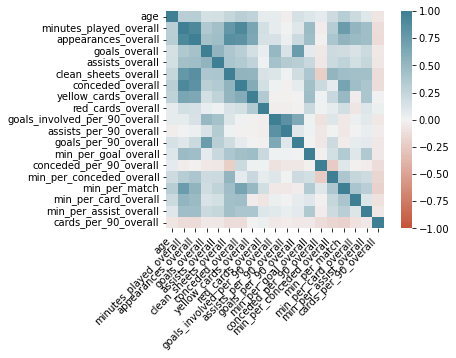

In [7]:
corr = df.corr()
ax = sea.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sea.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [8]:
#Vemos la cantidad de valores que hay en cada posición
col_names = ['position']

for col in col_names:
    print(df[col].value_counts())   

Midfielder    221
Defender      180
Forward       136
Goalkeeper     43
Name: position, dtype: int64


#### TECNICAS DE CLUSTERING (AGRUPAMIENTO) para estudiar los jugadores similares de cada posición.

# Modelo para los defensores 

In [9]:
#filtro para quedarme solo con los defensores
defensores= df[df['position']=='Defender']
df_aux= df[df['position']=='Defender']

In [10]:
defensores

,full_name,age,position,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
4,Adrià Giner Pedrosa,23,Defender,2723,31,1,1,9,37,8,...,0.07,0.03,0.03,2723,1.22,74,88,340,2723,0.26
7,Aïssa Mandi,30,Defender,1372,17,1,0,6,13,3,...,0.07,0.00,0.07,1372,0.85,106,81,457,0,0.20
10,Alberto Moreno,29,Defender,1222,24,3,2,11,9,3,...,0.37,0.15,0.22,407,0.66,136,51,407,611,0.22
12,Alberto Rodríguez Baro,24,Defender,237,5,0,0,1,5,1,...,0.00,0.00,0.00,0,1.90,47,47,237,0,0.38
15,Aleix Vidal,32,Defender,1904,31,2,0,6,31,10,...,0.09,0.00,0.09,952,1.47,61,61,190,0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,Víctor Ruiz,33,Defender,1425,18,0,0,4,17,2,...,0.00,0.00,0.00,0,1.07,84,79,713,0,0.13
568,Ximo Navarro,32,Defender,1350,18,0,0,4,19,5,...,0.00,0.00,0.00,0,1.27,71,75,225,0,0.40
574,Yeray Álvarez López,27,Defender,1860,22,0,0,6,19,6,...,0.00,0.00,0.00,0,0.92,98,85,310,0,0.29
577,Youssouf Sabaly,29,Defender,788,10,0,1,4,7,1,...,0.11,0.11,0.00,0,0.80,113,79,788,788,0.11


In [11]:
#relation_image=sea.pairplot(defensores)

In [12]:
defensores.pop('position')
defensores.pop('full_name')
defensores.pop('goals_overall')
defensores.pop('goals_per_90_overall')
defensores.pop('min_per_goal_overall')        
defensores.pop('goals_involved_per_90_overall')

4      0.07
7      0.07
10     0.37
12     0.00
15     0.09
       ... 
563    0.00
568    0.00
574    0.00
577    0.11
578    0.27
Name: goals_involved_per_90_overall, Length: 180, dtype: float64

In [13]:
defensores

,age,minutes_played_overall,appearances_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
4,23,2723,31,1,9,37,8,0,0.03,1.22,74,88,340,2723,0.26
7,30,1372,17,0,6,13,3,0,0.00,0.85,106,81,457,0,0.20
10,29,1222,24,2,11,9,3,0,0.15,0.66,136,51,407,611,0.22
12,24,237,5,0,1,5,1,0,0.00,1.90,47,47,237,0,0.38
15,32,1904,31,0,6,31,10,0,0.00,1.47,61,61,190,0,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,33,1425,18,0,4,17,2,0,0.00,1.07,84,79,713,0,0.13
568,32,1350,18,0,4,19,5,1,0.00,1.27,71,75,225,0,0.40
574,27,1860,22,0,6,19,6,0,0.00,0.92,98,85,310,0,0.29
577,29,788,10,1,4,7,1,0,0.11,0.80,113,79,788,788,0.11


In [14]:
#ajusto las variables catégoricas
#import warnings
#warnings.filterwarnings('ignore')
#le = LabelEncoder()
#defensores['full_name'] = le.fit_transform(defensores['full_name'])

In [15]:
#normalizo los datos para aplicar el algoritmo
scal = StandardScaler()
X_std = scal.fit_transform(defensores)
defe_norm = pd.DataFrame(X_std)
defe_norm_2 = pd.DataFrame(X_std)

In [16]:
defe_norm_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.083574,1.384306,1.109410,0.228585,0.717553,1.514001,1.074002,-0.468862,-0.185778,0.008202,-0.085440,1.056852,-0.018931,2.862165,-0.147991
1,0.591645,-0.038859,-0.218089,-0.578185,-0.005355,-0.376859,-0.390546,-0.468862,-0.437838,-0.538032,0.860969,0.731110,0.331723,-0.623526,-0.272664
2,0.352328,-0.196872,0.445661,1.035354,1.199491,-0.692002,-0.390546,-0.468862,0.822464,-0.818530,1.748226,-0.664927,0.181871,0.158611,-0.231106
3,-0.844257,-1.234487,-1.355946,-0.578185,-1.210201,-1.007146,-0.976365,-0.468862,-0.437838,1.012090,-0.883972,-0.851066,-0.327627,-0.623526,0.101354
4,1.070279,0.521558,1.109410,-0.578185,-0.005355,1.041286,1.659821,-0.468862,-0.437838,0.377278,-0.469918,-0.199582,-0.468488,-0.623526,0.288363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.309596,0.016972,-0.123268,-0.578185,-0.487293,-0.061716,-0.683456,-0.468862,-0.437838,-0.213244,0.210313,0.638041,1.098967,-0.623526,-0.418115
176,1.070279,-0.062035,-0.123268,-0.578185,-0.487293,0.095856,0.195273,1.493815,-0.437838,0.082017,-0.174165,0.451902,-0.363592,-0.623526,0.142912
177,-0.126306,0.475208,0.256018,-0.578185,-0.005355,0.095856,0.488183,-0.468862,-0.437838,-0.434690,0.624367,0.917248,-0.108843,-0.623526,-0.085655
178,0.352328,-0.654055,-0.881839,0.228585,-0.487293,-0.849574,-0.976365,-0.468862,0.486383,-0.611847,1.067996,0.638041,1.323746,0.385187,-0.459672


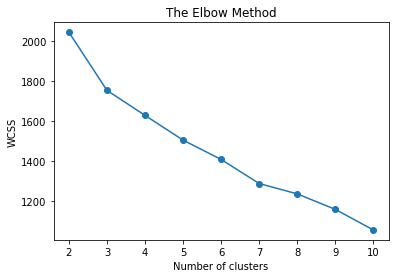

In [25]:
# Encontrar el número de clusters para ello utilizamos el método Elbow.
#Este encuentra el valor óptimo de un hiperparámetro.Nos quedaremos con el número de clusters para el cual la mejora deja de ser sustancial 
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(defe_norm)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 11), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
#Vamos a utilizar k-means creando 3 cluster y veremos los centroides y la información de cada cluster
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42).fit(defe_norm)
defe_norm['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2['freq']=defe_norm['cluster'].value_counts()
centers2['freq_r']=defe_norm['cluster'].value_counts(normalize=True)
print(centers2)

          0         1         2         3         4         5         6  \
0 -0.575636 -1.227178 -1.299827 -0.430003 -1.141353 -1.082716 -0.952454   
1  0.066188  1.235889  1.123840  0.754739  0.995191  1.132061  1.054899   
2  0.296018  0.038598  0.141117 -0.160563  0.119382  0.011509 -0.021825   

          7         8         9        10        11        12        13  \
0 -0.348698  0.129726  0.364624 -0.839911 -1.101782 -0.681034 -0.554584   
1  0.683144  0.071762 -0.133652  0.246961  0.803947  0.088832  0.926833   
2 -0.168688 -0.113619 -0.137866  0.350534  0.200068  0.344522 -0.181879   

         14            15  freq    freq_r  
0  0.236628  2.000000e+00    49  0.272222  
1 -0.066231  1.000000e+00    46  0.255556  
2 -0.100566  1.443290e-15    85  0.472222  


In [27]:
centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.575636,-1.227178,-1.299827,-0.430003,-1.141353,-1.082716,-0.952454,-0.348698,0.129726,0.364624,-0.839911,-1.101782,-0.681034,-0.554584,0.236628,2.000000e+00
1,0.066188,1.235889,1.123840,0.754739,0.995191,1.132061,1.054899,0.683144,0.071762,-0.133652,0.246961,0.803947,0.088832,0.926833,-0.066231,1.000000e+00
2,0.296018,0.038598,0.141117,-0.160563,0.119382,0.011509,-0.021825,-0.168688,-0.113619,-0.137866,0.350534,0.200068,0.344522,-0.181879,-0.100566,1.443290e-15


In [28]:
#Utilizamos ahora la tecnica de silhouette para poder evaluar nuestra tecnica.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
defensores['S_S'] = silhouette_samples(defe_norm,defe_norm['cluster'])
silhouette_score_mean = silhouette_score(defe_norm,defe_norm['cluster'])
print(silhouette_score_mean)


defensores['cluster']=kmeans.labels_
Centers_mean=defensores.groupby('cluster').mean()
Centers_mean['freq']=defensores['cluster'].value_counts()
Centers_mean['freq_r']=defensores['cluster'].value_counts(normalize=True)
Centers_mean

0.21491622644176117


,age,minutes_played_overall,appearances_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S,freq,freq_r
cluster,,,,,,,,,,,,,,,,,,
0,25.122449,243.938776,5.591837,0.183673,1.285714,4.040816,1.081633,0.061224,0.067551,1.461429,48.489796,41.612245,119.081633,53.857143,0.445102,0.213871,49,0.272222
1,27.804348,2582.108696,31.152174,1.652174,10.152174,32.152174,7.934783,0.586957,0.060652,1.123913,85.239130,82.565217,375.956522,1211.130435,0.299348,0.130397,46,0.255556
2,28.764706,1445.529412,20.788235,0.517647,6.517647,17.929412,4.258824,0.152941,0.038588,1.121059,88.741176,69.588235,461.270588,345.011765,0.282824,0.261258,85,0.472222


In [29]:
# Prueba con AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(defe_norm)
defensores['cluster_hc']=y_hc
defe_norm['cluster_hc']=y_hc
defensores['S_S_hc'] = silhouette_samples(defe_norm,defe_norm['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(defe_norm,defe_norm['cluster_hc'])
print(silhouette_score_mean_hc)


0.21673582167062563


In [30]:
Centers_mean_hc=defensores.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=defensores['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=defensores['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

,age,minutes_played_overall,appearances_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,assists_per_90_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,,,,,,
0,25.120000,245.900000,5.580000,0.180000,1.300000,4.000000,1.080000,0.060000,0.066200,1.442800,50.940000,42.140000,123.540000,52.780000,0.441400,0.231065,50,0.277778
1,28.863636,1556.931818,21.818182,0.545455,6.727273,19.931818,4.556818,0.102273,0.039091,1.151136,85.795455,70.681818,473.068182,360.261364,0.280795,0.249332,88,0.488889
2,27.595238,2483.214286,30.357143,1.714286,10.166667,29.690476,7.738095,0.738095,0.062619,1.075238,89.119048,81.547619,345.952381,1269.880952,0.305714,0.131380,42,0.233333


In [31]:
#variables que representan mayormente a mis variables del modelo de dato
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_defensa=pca.fit_transform(defe_norm_2)
pca_def_df=pd.DataFrame(data=pca_defensa, columns=['Componente_1','Componente_2'])
pca_nombres_def=pd.concat([pca_def_df,defe_norm[['cluster_hc']]],axis=1)
#defe_norm['PCA1']=pca_def_df['Componente_1']
#defe_norm['PCA2']=pca_def_df['Componente_2']
pca_nombres_def

,Componente_1,Componente_2,cluster_hc
0,2.982579,0.027112,2
1,-0.038828,-0.361356,1
2,0.644564,-2.180346,1
3,-3.193908,0.389759,0
4,1.059895,1.842408,1
...,...,...,...
175,-0.118147,-0.102629,1
176,-0.024129,1.427883,1
177,0.632730,0.224760,1
178,-0.542629,-1.878210,1


In [32]:
defe_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster,cluster_hc
0,-1.083574,1.384306,1.109410,0.228585,0.717553,1.514001,1.074002,-0.468862,-0.185778,0.008202,-0.085440,1.056852,-0.018931,2.862165,-0.147991,1,2
1,0.591645,-0.038859,-0.218089,-0.578185,-0.005355,-0.376859,-0.390546,-0.468862,-0.437838,-0.538032,0.860969,0.731110,0.331723,-0.623526,-0.272664,2,1
2,0.352328,-0.196872,0.445661,1.035354,1.199491,-0.692002,-0.390546,-0.468862,0.822464,-0.818530,1.748226,-0.664927,0.181871,0.158611,-0.231106,2,1
3,-0.844257,-1.234487,-1.355946,-0.578185,-1.210201,-1.007146,-0.976365,-0.468862,-0.437838,1.012090,-0.883972,-0.851066,-0.327627,-0.623526,0.101354,0,0
4,1.070279,0.521558,1.109410,-0.578185,-0.005355,1.041286,1.659821,-0.468862,-0.437838,0.377278,-0.469918,-0.199582,-0.468488,-0.623526,0.288363,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.309596,0.016972,-0.123268,-0.578185,-0.487293,-0.061716,-0.683456,-0.468862,-0.437838,-0.213244,0.210313,0.638041,1.098967,-0.623526,-0.418115,2,1
176,1.070279,-0.062035,-0.123268,-0.578185,-0.487293,0.095856,0.195273,1.493815,-0.437838,0.082017,-0.174165,0.451902,-0.363592,-0.623526,0.142912,2,1
177,-0.126306,0.475208,0.256018,-0.578185,-0.005355,0.095856,0.488183,-0.468862,-0.437838,-0.434690,0.624367,0.917248,-0.108843,-0.623526,-0.085655,2,1
178,0.352328,-0.654055,-0.881839,0.228585,-0.487293,-0.849574,-0.976365,-0.468862,0.486383,-0.611847,1.067996,0.638041,1.323746,0.385187,-0.459672,2,1


In [33]:
pca.explained_variance_ratio_*100

array([37.38789422, 11.83429858])

In [34]:
#import scipy.cluster.hierarchy as sch
#plt.figure(figsize = (10,7))
#plt.title('Dendrograms')
#plt.axhline(y=3, color='r', linestyle='--')
#dend = sch.dendrogram(sch.linkage(pca_nombres_def, method='ward'))

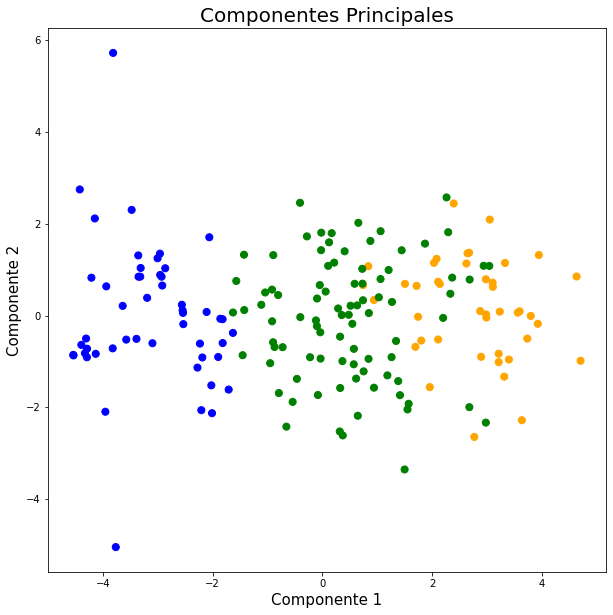

In [35]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot()
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green","orange","red","yellow","blueviolet","aquamarine","brown"])
ax.scatter(x=pca_nombres_def.Componente_1,y=pca_nombres_def.Componente_2, c=color_theme[pca_nombres_def.cluster_hc],s=50)
plt.show()

In [36]:
#pca = PCA(random_state=123)
#pca.fit(defe_norm)
#features = range(pca.n_components_)

#plt.figure(figsize=(8,4))
#plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
#plt.xlabel('PCA feature')
#plt.ylabel('Variance')
#plt.xticks(features[:15])
#plt.show()

In [59]:
model=PCA(n_components=2).fit(defe_norm_2)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
#cuanto más alto sea el valor en valor absoluto, mayor será la influencia de la variable en el componente principal.
defe_norm.columns[most_important]
X_train_pca=defe_norm_2[defe_norm_2.columns[most_important]]
X_train_pca.head()

,1,8
0,1.384306,-0.185778
1,-0.038859,-0.437838
2,-0.196872,0.822464
3,-1.234487,-0.437838
4,0.521558,-0.437838


In [38]:
#defensores['full_name'] = le.inverse_transform(defensores['full_name'])

In [39]:
defensores['full_name']=df_aux['full_name']

In [40]:
#prueba=defensores[defensores['cluster_hc']==2]
#prueba

In [41]:
defensores.to_csv('cluster_defensores.csv',index=False)

# Modelo para los mediocampistas

In [42]:
Midfielder= df[df['position']=='Midfielder']
Midfielder_aux= df[df['position']=='Midfielder']

In [43]:
Midfielder

,full_name,age,position,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
2,Adama Traoré Diarra,26,Midfielder,378,11,0,2,2,7,0,...,0.48,0.48,0.00,0,1.67,54,34,0,189,0.00
3,Adnan Januzaj,27,Midfielder,1625,33,3,0,17,13,5,...,0.17,0.00,0.17,542,0.72,125,49,325,0,0.28
6,Aihen Muñoz Capellán,24,Midfielder,1343,20,0,0,11,16,4,...,0.00,0.00,0.00,0,1.07,84,67,336,0,0.27
13,Alberto Soro Álvarez,23,Midfielder,575,16,0,0,4,9,0,...,0.00,0.00,0.00,0,1.41,64,36,0,0,0.00
14,Aleix Febas Pérez,26,Midfielder,115,4,0,0,0,5,1,...,0.00,0.00,0.00,0,3.91,23,29,115,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,William Silva de Carvalho,30,Midfielder,1804,33,2,3,12,24,6,...,0.25,0.15,0.10,902,1.20,75,55,301,601,0.30
570,Yan Brice Eteki,24,Midfielder,336,12,0,0,2,6,3,...,0.00,0.00,0.00,0,1.61,56,28,112,0,0.80
571,Yangel Clemente Herrera Ravelo,24,Midfielder,1648,23,1,1,6,22,7,...,0.11,0.05,0.05,1648,1.20,75,72,235,1648,0.38
572,Yannick Carrasco,28,Midfielder,2592,34,6,6,11,30,5,...,0.42,0.21,0.21,432,1.04,86,76,518,432,0.17


In [44]:
Midfielder.pop('position')
Midfielder.pop('full_name')

2                 Adama Traoré Diarra
3                       Adnan Januzaj
6                Aihen Muñoz Capellán
13               Alberto Soro Álvarez
14                  Aleix Febas Pérez
                    ...              
566         William Silva de Carvalho
570                   Yan Brice Eteki
571    Yangel Clemente Herrera Ravelo
572                  Yannick Carrasco
575          Yeremi Jesús Pino Santos
Name: full_name, Length: 221, dtype: object

In [45]:
#le3 = LabelEncoder()
#Midfielder['full_name'] = le3.fit_transform(Midfielder['full_name'])

In [46]:
Midfielder

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
2,26,378,11,0,2,2,7,0,0,0.48,0.48,0.00,0,1.67,54,34,0,189,0.00
3,27,1625,33,3,0,17,13,5,0,0.17,0.00,0.17,542,0.72,125,49,325,0,0.28
6,24,1343,20,0,0,11,16,4,1,0.00,0.00,0.00,0,1.07,84,67,336,0,0.27
13,23,575,16,0,0,4,9,0,0,0.00,0.00,0.00,0,1.41,64,36,0,0,0.00
14,26,115,4,0,0,0,5,1,0,0.00,0.00,0.00,0,3.91,23,29,115,0,0.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,30,1804,33,2,3,12,24,6,0,0.25,0.15,0.10,902,1.20,75,55,301,601,0.30
570,24,336,12,0,0,2,6,3,0,0.00,0.00,0.00,0,1.61,56,28,112,0,0.80
571,24,1648,23,1,1,6,22,7,1,0.11,0.05,0.05,1648,1.20,75,72,235,1648,0.38
572,28,2592,34,6,6,11,30,5,0,0.42,0.21,0.21,432,1.04,86,76,518,432,0.17


In [47]:
scal = StandardScaler()
X_std = scal.fit_transform(Midfielder)
Midfielder_norm = pd.DataFrame(X_std)
Midfielder_norm_2 = pd.DataFrame(X_std)

In [48]:
Midfielder_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.109404,-0.932068,-0.869538,-0.644272,0.330858,-1.032811,-0.692919,-1.163937,-0.391969,1.566214,3.674873,-0.566336,-0.679332,0.926146,-0.596374,-0.715908,-1.197073,-0.444218,-0.241507
1,0.104563,0.431672,1.054765,0.756227,-0.663967,2.249805,-0.183601,0.435753,-0.391969,0.036834,-0.690531,0.539550,0.082462,-0.649706,1.184012,-0.052993,0.122971,-0.756023,-0.131175
2,-0.537339,0.123272,-0.082323,-0.644272,-0.663967,0.936759,0.071059,0.115815,2.233037,-0.801858,-0.690531,-0.566336,-0.679332,-0.069129,0.155902,0.742505,0.167650,-0.756023,-0.135115
3,-0.751306,-0.716625,-0.432196,-0.644272,-0.663967,-0.595129,-0.523146,-1.163937,-0.391969,-0.801858,-0.690531,-0.566336,-0.679332,0.494860,-0.345616,-0.627519,-1.197073,-0.756023,-0.241507
4,-0.109404,-1.219689,-1.481816,-0.644272,-0.663967,-1.470493,-0.862692,-0.843999,-0.391969,-0.801858,-0.690531,-0.566336,-0.679332,4.641837,-1.373726,-0.936880,-0.729980,-0.756023,0.065846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.746465,0.627429,1.054765,0.289394,0.828270,1.155600,0.750150,0.755690,-0.391969,0.431512,0.673658,0.084185,0.588450,0.146514,-0.069781,0.212173,0.025491,0.235483,-0.123294
217,-0.537339,-0.978000,-0.782069,-0.644272,-0.663967,-1.032811,-0.777806,-0.204123,-0.391969,-0.801858,-0.690531,-0.566336,-0.679332,0.826618,-0.546223,-0.981074,-0.742165,-0.756023,0.073727
218,-0.537339,0.456825,0.180082,-0.177439,-0.166554,-0.157447,0.580377,1.075628,2.233037,-0.259175,-0.235801,-0.241076,1.636971,0.146514,-0.069781,0.963476,-0.242579,1.962780,-0.091771
219,0.318531,1.489198,1.142233,2.156727,2.320507,0.936759,1.259469,0.435753,-0.391969,1.270205,1.219334,0.799759,-0.072146,-0.118893,0.206053,1.140254,0.906874,-0.043327,-0.174520


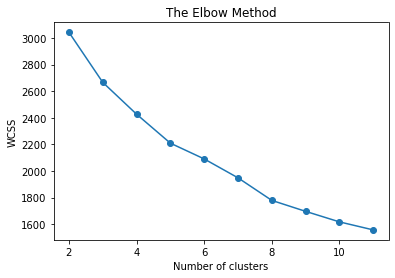

In [49]:
# Encontrar el número de clusters para ello utilizamos el método Elbow.
#Este encuentra el valor óptimo de un hiperparámetro.Nos quedaremos con el número de clusters para el cual la mejora deja de ser sustancial 
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Midfielder_norm)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 12), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [50]:
#Vamos a utilizar k-means creando 5 cluster y veremos los centroides y la información de cada cluster
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42).fit(Midfielder_norm)
Midfielder_norm['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2['freq']=Midfielder_norm['cluster'].value_counts()
centers2['freq_r']=Midfielder_norm['cluster'].value_counts(normalize=True)
print(centers2)

          0         1         2         3         4         5         6  \
0  0.174909 -0.063002  0.193262 -0.279758 -0.364156  0.181307 -0.024293   
1 -0.544131 -1.103696 -1.211081 -0.599812 -0.608699 -1.046706 -0.990695   
2  0.392082  0.749196  0.786893  1.719071  1.667653  0.608497  0.675875   
3  0.279230  1.132992  0.894109  0.117905  0.290253  0.789376  0.973627   
4 -1.179241 -1.339713 -1.700487 -0.644272 -0.663967 -1.361073 -1.287124   

          7         8         9  ...        11        12        13        14  \
0  0.137728  0.111457 -0.201731  ... -0.115427 -0.325448  0.038806  0.285059   
1 -0.986194 -0.225302 -0.516813  ... -0.401124 -0.629581  0.174950 -0.652497   
2  0.035830 -0.391969  1.706509  ...  1.312044 -0.004154 -0.125631  0.324380   
3  1.108275  0.411604 -0.083986  ... -0.122920  1.352482 -0.050171  0.361626   
4 -0.843999 -0.391969 -0.801858  ... -0.566336 -0.679332 -1.844035 -1.950471   

         15        16        17        18  freq    freq_r  
0  0.028

In [51]:
#Utilizamos ahora la tecnica de silhouette para poder evaluar nuestra tecnica.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
Midfielder['S_S'] = silhouette_samples(Midfielder,Midfielder_norm['cluster'])
silhouette_score_mean = silhouette_score(Midfielder_norm,Midfielder_norm['cluster'])
print(silhouette_score_mean)


Midfielder['cluster']=kmeans.labels_
Centers_mean=Midfielder.groupby('cluster').mean()
Centers_mean['freq']=Midfielder['cluster'].value_counts()
Centers_mean['freq_r']=Midfielder['cluster'].value_counts(normalize=True)
Centers_mean

0.23390540818564365


,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,...,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S,freq,freq_r
cluster,,,,,,,,,,,,,,,,,,,,,
0,27.328767,1172.671233,23.150685,0.780822,0.602740,7.547945,14.876712,4.068493,0.191781,0.121644,...,251.780822,1.135068,89.150685,50.849315,344.178082,440.095890,0.326849,-0.032821,73,0.330317
1,23.968254,221.063492,7.095238,0.095238,0.111111,1.936508,3.492063,0.555556,0.063492,0.057778,...,35.396825,1.217143,51.761905,29.111111,64.492063,32.238095,0.247143,-0.269617,63,0.285068
2,28.343750,1915.343750,29.937500,5.062500,4.687500,9.500000,23.125000,3.750000,0.000000,0.508437,...,480.375000,1.035937,90.718750,61.750000,568.968750,432.687500,0.225312,0.127365,32,0.144796
3,27.816327,2266.285714,31.163265,1.632653,1.918367,10.326531,26.632653,7.102041,0.306122,0.145510,...,1445.591837,1.081429,92.204082,72.530612,361.591837,1087.183673,0.297143,0.041672,49,0.221719
4,21.000000,5.250000,1.500000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.500000,5.250000,0.000000,18.562500,0.962231,4,0.018100


In [52]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters =5 , affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(Midfielder_norm)
Midfielder['cluster_hc']=y_hc
Midfielder_norm['cluster_hc']=y_hc
Midfielder['S_S_hc'] = silhouette_samples(Midfielder_norm,Midfielder_norm['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(Midfielder_norm,Midfielder_norm['cluster_hc'])
print(silhouette_score_mean_hc)


0.24166669940499258


In [53]:
Centers_mean_hc=Midfielder.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=Midfielder['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=Midfielder['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,...,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,,,,,,,,,
0,28.588235,1878.794118,30.352941,4.941176,4.264706,9.676471,22.764706,4.000000,0.000000,0.483824,...,457.147059,1.052353,89.352941,59.617647,523.500000,452.029412,0.244706,0.239157,34,0.153846
1,24.203390,218.610169,7.271186,0.186441,0.000000,2.254237,3.067797,0.440678,0.016949,0.043898,...,51.898305,1.129831,56.322034,27.745763,86.271186,0.000000,0.210847,0.314172,59,0.266968
2,26.773333,1133.760000,21.853333,0.626667,0.786667,6.933333,14.653333,3.946667,0.226667,0.130667,...,232.706667,1.202000,84.280000,51.680000,318.133333,429.560000,0.347067,0.144702,75,0.339367
3,27.897959,2246.163265,31.061224,1.612245,1.857143,10.224490,26.469388,6.979592,0.306122,0.144490,...,1444.040816,1.083469,92.000000,72.163265,374.775510,1095.714286,0.294082,0.270035,49,0.221719
4,21.000000,5.250000,1.500000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.500000,5.250000,0.000000,18.562500,0.664141,4,0.018100


In [54]:
Midfielder_norm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,cluster,cluster_hc
0,-0.109404,-0.932068,-0.869538,-0.644272,0.330858,-1.032811,-0.692919,-1.163937,-0.391969,1.566214,...,-0.566336,-0.679332,0.926146,-0.596374,-0.715908,-1.197073,-0.444218,-0.241507,1,2
1,0.104563,0.431672,1.054765,0.756227,-0.663967,2.249805,-0.183601,0.435753,-0.391969,0.036834,...,0.539550,0.082462,-0.649706,1.184012,-0.052993,0.122971,-0.756023,-0.131175,0,2
2,-0.537339,0.123272,-0.082323,-0.644272,-0.663967,0.936759,0.071059,0.115815,2.233037,-0.801858,...,-0.566336,-0.679332,-0.069129,0.155902,0.742505,0.167650,-0.756023,-0.135115,0,2
3,-0.751306,-0.716625,-0.432196,-0.644272,-0.663967,-0.595129,-0.523146,-1.163937,-0.391969,-0.801858,...,-0.566336,-0.679332,0.494860,-0.345616,-0.627519,-1.197073,-0.756023,-0.241507,1,1
4,-0.109404,-1.219689,-1.481816,-0.644272,-0.663967,-1.470493,-0.862692,-0.843999,-0.391969,-0.801858,...,-0.566336,-0.679332,4.641837,-1.373726,-0.936880,-0.729980,-0.756023,0.065846,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.746465,0.627429,1.054765,0.289394,0.828270,1.155600,0.750150,0.755690,-0.391969,0.431512,...,0.084185,0.588450,0.146514,-0.069781,0.212173,0.025491,0.235483,-0.123294,3,3
217,-0.537339,-0.978000,-0.782069,-0.644272,-0.663967,-1.032811,-0.777806,-0.204123,-0.391969,-0.801858,...,-0.566336,-0.679332,0.826618,-0.546223,-0.981074,-0.742165,-0.756023,0.073727,1,1
218,-0.537339,0.456825,0.180082,-0.177439,-0.166554,-0.157447,0.580377,1.075628,2.233037,-0.259175,...,-0.241076,1.636971,0.146514,-0.069781,0.963476,-0.242579,1.962780,-0.091771,3,3
219,0.318531,1.489198,1.142233,2.156727,2.320507,0.936759,1.259469,0.435753,-0.391969,1.270205,...,0.799759,-0.072146,-0.118893,0.206053,1.140254,0.906874,-0.043327,-0.174520,2,0


In [55]:
#variables que representan mayormente a mis variables del modelo de dato
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_mid=pca.fit_transform(Midfielder_norm_2)
pca_mid_df=pd.DataFrame(data=pca_mid, columns=['Componente_1','Componente_2'])
pca_mid_df_def=pd.concat([pca_mid_df,Midfielder_norm[['cluster_hc']]],axis=1)
#Midfielder_norm['PCA1']=pca_mid_df_def['Componente_1']
#Midfielder_norm['PCA2']=pca_mid_df_def['Componente_2']
pca_mid_df_def

,Componente_1,Componente_2,cluster_hc
0,-1.535981,2.611973,2
1,1.311908,-0.186938,2
2,-0.299486,-1.645653,2
3,-2.646942,-0.388754,1
4,-3.560002,-0.311274,1
...,...,...,...
216,2.174344,0.045920,3
217,-2.850125,-0.413127,1
218,1.411204,-2.091132,3
219,3.956563,1.984833,0


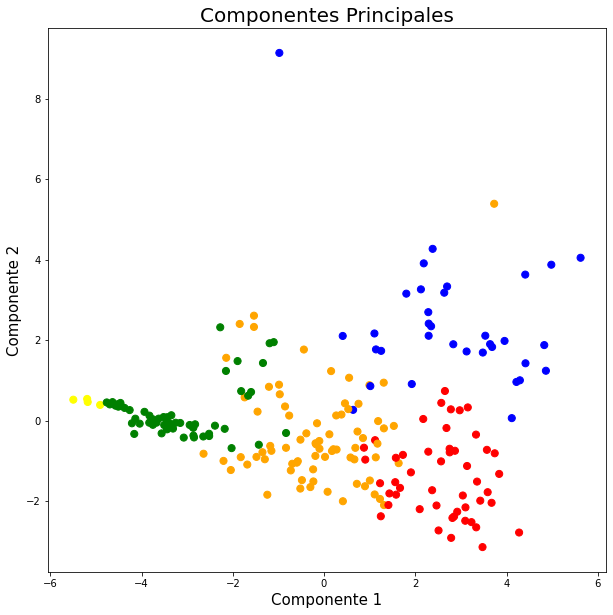

In [56]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot()
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green","orange","red","yellow","blueviolet","aquamarine","brown"])
ax.scatter(x=pca_mid_df_def.Componente_1,y=pca_mid_df_def.Componente_2, c=color_theme[pca_mid_df_def.cluster_hc],s=50)
plt.show()

In [57]:
pca.explained_variance_ratio_*100

array([37.5444102 , 13.51468631])

In [58]:
Midfielder_norm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,cluster,cluster_hc
0,-0.109404,-0.932068,-0.869538,-0.644272,0.330858,-1.032811,-0.692919,-1.163937,-0.391969,1.566214,...,-0.566336,-0.679332,0.926146,-0.596374,-0.715908,-1.197073,-0.444218,-0.241507,1,2
1,0.104563,0.431672,1.054765,0.756227,-0.663967,2.249805,-0.183601,0.435753,-0.391969,0.036834,...,0.539550,0.082462,-0.649706,1.184012,-0.052993,0.122971,-0.756023,-0.131175,0,2
2,-0.537339,0.123272,-0.082323,-0.644272,-0.663967,0.936759,0.071059,0.115815,2.233037,-0.801858,...,-0.566336,-0.679332,-0.069129,0.155902,0.742505,0.167650,-0.756023,-0.135115,0,2
3,-0.751306,-0.716625,-0.432196,-0.644272,-0.663967,-0.595129,-0.523146,-1.163937,-0.391969,-0.801858,...,-0.566336,-0.679332,0.494860,-0.345616,-0.627519,-1.197073,-0.756023,-0.241507,1,1
4,-0.109404,-1.219689,-1.481816,-0.644272,-0.663967,-1.470493,-0.862692,-0.843999,-0.391969,-0.801858,...,-0.566336,-0.679332,4.641837,-1.373726,-0.936880,-0.729980,-0.756023,0.065846,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.746465,0.627429,1.054765,0.289394,0.828270,1.155600,0.750150,0.755690,-0.391969,0.431512,...,0.084185,0.588450,0.146514,-0.069781,0.212173,0.025491,0.235483,-0.123294,3,3
217,-0.537339,-0.978000,-0.782069,-0.644272,-0.663967,-1.032811,-0.777806,-0.204123,-0.391969,-0.801858,...,-0.566336,-0.679332,0.826618,-0.546223,-0.981074,-0.742165,-0.756023,0.073727,1,1
218,-0.537339,0.456825,0.180082,-0.177439,-0.166554,-0.157447,0.580377,1.075628,2.233037,-0.259175,...,-0.241076,1.636971,0.146514,-0.069781,0.963476,-0.242579,1.962780,-0.091771,3,3
219,0.318531,1.489198,1.142233,2.156727,2.320507,0.936759,1.259469,0.435753,-0.391969,1.270205,...,0.799759,-0.072146,-0.118893,0.206053,1.140254,0.906874,-0.043327,-0.174520,2,0


In [289]:
#Midfielder_norm.pop('cluster')
#Midfielder_norm.pop('cluster_hc')

In [60]:
model=PCA(n_components=2).fit(Midfielder_norm_2)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
#cuanto más alto sea el valor en valor absoluto, mayor será la influencia de la variable en el componente principal.
Midfielder_norm.columns[most_important]
X_train_pca=Midfielder_norm_2[Midfielder_norm_2.columns[most_important]]
X_train_pca.head()

,1,9
0,-0.932068,1.566214
1,0.431672,0.036834
2,0.123272,-0.801858
3,-0.716625,-0.801858
4,-1.219689,-0.801858


In [61]:
Midfielder['full_name']=Midfielder_aux['full_name']

In [62]:
Midfielder

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,...,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S,cluster,cluster_hc,S_S_hc,full_name
2,26,378,11,0,2,2,7,0,0,0.48,...,54,34,0,189,0.00,0.155049,1,2,-0.025372,Adama Traoré Diarra
3,27,1625,33,3,0,17,13,5,0,0.17,...,125,49,325,0,0.28,-0.085217,0,2,0.215160,Adnan Januzaj
6,24,1343,20,0,0,11,16,4,1,0.00,...,84,67,336,0,0.27,0.200499,0,2,0.220971,Aihen Muñoz Capellán
13,23,575,16,0,0,4,9,0,0,0.00,...,64,36,0,0,0.00,0.216626,1,1,0.343701,Alberto Soro Álvarez
14,26,115,4,0,0,0,5,1,0,0.00,...,23,29,115,0,0.78,-0.358037,1,1,0.209001,Aleix Febas Pérez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,30,1804,33,2,3,12,24,6,0,0.25,...,75,55,301,601,0.30,-0.343681,3,3,0.261700,William Silva de Carvalho
570,24,336,12,0,0,2,6,3,0,0.00,...,56,28,112,0,0.80,0.179621,1,1,0.351965,Yan Brice Eteki
571,24,1648,23,1,1,6,22,7,1,0.11,...,75,72,235,1648,0.38,0.255324,3,3,0.277899,Yangel Clemente Herrera Ravelo
572,28,2592,34,6,6,11,30,5,0,0.42,...,86,76,518,432,0.17,0.407722,2,0,0.383452,Yannick Carrasco


In [43]:
#Midfielder['full_name'] = le3.inverse_transform(Midfielder['full_name'])

In [63]:
Midfielder.to_csv('cluster_mediocampistas.csv',index = False)

# Modelo para los delanteros

In [64]:
delanteros= df[df['position']=='Forward']
delanteros_aux= df[df['position']=='Forward']

In [65]:
delanteros

,full_name,age,position,minutes_played_overall,appearances_overall,goals_overall,assists_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,...,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall
1,Abdón Prats Bastidas,29,Forward,631,23,3,0,5,10,4,...,0.43,0.00,0.43,210,1.43,63,27,158,0,0.57
5,Adrián Embarba Blázquez,29,Forward,1997,32,0,2,9,22,4,...,0.09,0.09,0.00,0,0.99,91,62,499,999,0.18
9,Aitor Ruibal García,26,Forward,855,19,0,0,5,11,6,...,0.00,0.00,0.00,0,1.16,78,45,143,0,0.63
11,Alberto Perea Correoso,31,Forward,772,18,0,1,5,12,2,...,0.12,0.12,0.00,0,1.40,64,43,386,772,0.23
16,Alejandro Asensio Crespillo,21,Forward,11,2,0,0,0,0,0,...,0.00,0.00,0.00,0,0.00,0,6,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,Vinícius José Paixão de Oliveira Júnior,21,Forward,2699,35,17,10,15,22,6,...,0.90,0.33,0.57,159,0.73,123,77,450,270,0.20
567,Willian José,30,Forward,1608,32,8,4,12,18,1,...,0.67,0.22,0.45,201,1.01,89,50,1608,402,0.06
569,Yacine Qasmi,31,Forward,3,1,0,0,0,0,0,...,0.00,0.00,0.00,0,0.00,0,3,0,0,0.00
576,Youssef En-Nesyri,24,Forward,1281,23,5,1,11,5,1,...,0.42,0.07,0.35,256,0.35,256,56,1281,1281,0.07


In [66]:
delanteros.pop('position')
delanteros.pop('full_name')
delanteros.pop('clean_sheets_overall')
delanteros.pop('conceded_overall')
delanteros.pop('conceded_per_90_overall')
delanteros.pop('min_per_conceded_overall')       

1       63
5       91
9       78
11      64
16       0
      ... 
564    123
567     89
569      0
576    256
579    190
Name: min_per_conceded_overall, Length: 136, dtype: int64

In [554]:
#le4 = LabelEncoder()
#delanteros['full_name'] = le4.fit_transform(delanteros['full_name'])

In [67]:
scal = StandardScaler()
X_std = scal.fit_transform(delanteros)
delanteros_norm = pd.DataFrame(X_std)
delanteros_norm_2 = pd.DataFrame(X_std)

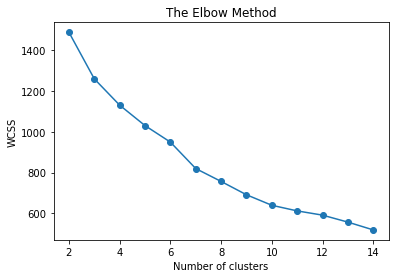

In [68]:
# Encontrar el número de clusters para ello utilizamos el método Elbow.
#Este encuentra el valor óptimo de un hiperparámetro.Nos quedaremos con el número de clusters para el cual la mejora deja de ser sustancial 
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(delanteros_norm)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 15), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
#Vamos a utilizar k-means creando 6 cluster y veremos los centroides y la información de cada cluster
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters =6, init = "k-means++", random_state = 42).fit(delanteros_norm)
delanteros_norm['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2['freq']=delanteros_norm['cluster'].value_counts()
centers2['freq_r']=delanteros_norm['cluster'].value_counts(normalize=True)
print(centers2)

          0         1         2         3         4         5         6  \
0  0.647309  1.209259  1.006711 -0.027086  1.129212 -0.412342 -0.266207   
1 -1.313696 -1.257737 -1.525476 -0.788182 -0.313081 -1.027360 -0.266207   
2 -0.611182 -0.982045 -1.056816 -0.696850 -0.662456 -0.763781 -0.204635   
3  0.094205  0.893282  0.773867  0.940351  0.613610  1.233920  3.421252   
4  0.523615  1.057650  0.887378  1.293161  0.901372  0.799058 -0.266207   
5  0.254354  0.028602  0.316909 -0.303364 -0.192367  0.156550 -0.266207   

          7          8         9        10        11        12        13  \
0 -0.049978   0.068048 -0.238279  2.031297  1.011874  3.010913  0.089944   
1  9.543488  11.185954 -0.972045 -0.725551 -1.886201 -0.887317 -0.768042   
2 -0.416976  -0.214114 -0.487450 -0.505640 -0.834364 -0.660234 -0.664918   
3  0.359999   0.036303  0.707329 -0.094359  0.801933  0.011990  1.028987   
4  0.460767   0.049104  0.901463 -0.106918  0.941047  0.122154  0.446021   
5 -0.145621  -0.07

In [70]:
#Utilizamos ahora la tecnica de silhouette para poder evaluar nuestra tecnica.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
delanteros['S_S'] = silhouette_samples(delanteros_norm,delanteros_norm['cluster'])
silhouette_score_mean = silhouette_score(delanteros_norm,delanteros_norm['cluster'])
print(silhouette_score_mean)


delanteros['cluster']=kmeans.labels_
Centers_mean=delanteros.groupby('cluster').mean()
Centers_mean['freq']=delanteros['cluster'].value_counts()
Centers_mean['freq_r']=delanteros['cluster'].value_counts(normalize=True)
Centers_mean

0.28628409279157374


,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S,freq,freq_r
cluster,,,,,,,,,,,,,,,,,,
0,29.285714,2153.285714,32.000000,3.571429,4.285714,1.571429,0.000000,0.350000,0.175714,0.174286,1134.142857,67.571429,1588.428571,465.428571,0.065714,0.237136,7,0.051471
1,20.000000,17.000000,3.000000,0.000000,1.000000,0.000000,0.000000,5.290000,5.290000,0.000000,0.000000,6.000000,0.000000,17.000000,0.000000,0.000000,1,0.007353
2,23.326531,255.734694,8.367347,0.428571,0.204082,0.673469,0.020408,0.161020,0.045918,0.115102,90.469388,28.346939,92.530612,70.897959,0.323673,0.413035,49,0.360294
3,26.666667,1879.666667,29.333333,8.111111,3.111111,5.777778,1.222222,0.561111,0.161111,0.398889,259.666667,63.111111,366.444444,956.222222,0.362222,0.196041,9,0.066176
4,28.700000,2022.000000,30.633333,9.766667,3.766667,4.666667,0.000000,0.613000,0.167000,0.445000,254.500000,66.066667,411.333333,651.533333,0.213333,0.150981,30,0.220588
5,27.425000,1130.900000,24.100000,2.275000,1.275000,3.025000,0.000000,0.300750,0.110250,0.190000,456.250000,46.200000,447.025000,550.100000,0.270250,0.268554,40,0.294118


In [71]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(delanteros_norm)
delanteros['cluster_hc']=y_hc
delanteros_norm['cluster_hc']=y_hc
delanteros['S_S_hc'] = silhouette_samples(delanteros_norm,delanteros_norm['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(delanteros_norm,delanteros_norm['cluster_hc'])
print(silhouette_score_mean_hc)

0.418018562608559


In [73]:
Centers_mean_hc=delanteros.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=delanteros['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=delanteros['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,,,,,,
0,28.204545,1907.318182,29.704545,8.863636,3.250000,4.659091,0.250000,0.588182,0.150227,0.437500,261.068182,63.636364,422.431818,775.068182,0.239318,0.263364,44,0.323529
1,23.404255,264.531915,8.510638,0.446809,0.212766,0.617021,0.021277,0.167872,0.047872,0.120000,94.319149,29.042553,95.404255,73.914894,0.180851,0.532102,47,0.345588
2,21.500000,49.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,25.000000,0.000000,3.680000,0.863569,2,0.014706
3,29.285714,2153.285714,32.000000,3.571429,4.285714,1.571429,0.000000,0.350000,0.175714,0.174286,1134.142857,67.571429,1588.428571,465.428571,0.065714,0.279135,7,0.051471
4,27.342857,1111.171429,24.000000,1.914286,1.400000,3.085714,0.000000,0.274000,0.121714,0.151143,478.142857,45.657143,426.628571,458.657143,0.284000,0.473504,35,0.257353
5,20.000000,17.000000,3.000000,0.000000,1.000000,0.000000,0.000000,5.290000,5.290000,0.000000,0.000000,6.000000,0.000000,17.000000,0.000000,0.000000,1,0.007353


In [74]:
#variables que representan mayormente a mis variables del modelo de dato
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_del=pca.fit_transform(delanteros_norm_2)
pca_del_df=pd.DataFrame(data=pca_del, columns=['Componente_1','Componente_2'])
pca_del_df_def=pd.concat([pca_del_df,delanteros_norm[['cluster_hc']]],axis=1)
#Midfielder_norm['PCA1']=pca_mid_df_def['Componente_1']
#Midfielder_norm['PCA2']=pca_mid_df_def['Componente_2']
pca_del_df_def

,Componente_1,Componente_2,cluster_hc
0,-0.692304,0.165452,4
1,1.035739,-1.191489,4
2,-1.189370,-1.004582,4
3,-0.747104,-0.610497,4
4,-3.670065,0.000106,1
...,...,...,...
131,4.325823,1.601413,0
132,2.238409,0.519987,3
133,-3.290112,-0.025299,1
134,1.082146,-0.329115,4


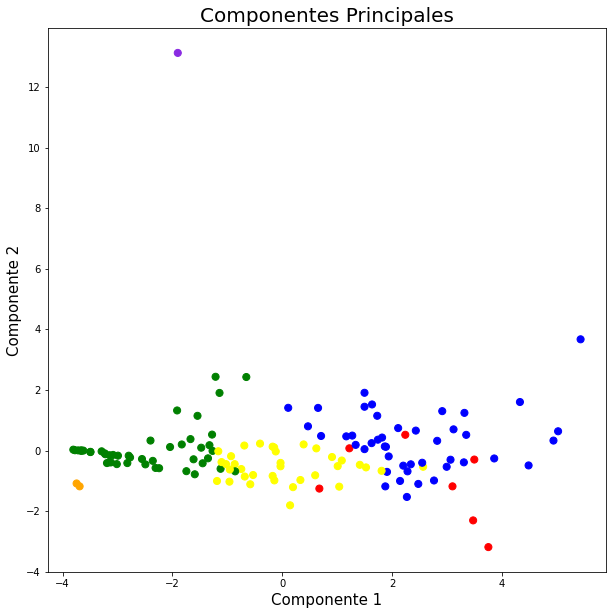

In [75]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot()
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green","orange","red","yellow","blueviolet","aquamarine","brown"])
ax.scatter(x=pca_del_df_def.Componente_1,y=pca_del_df_def.Componente_2, c=color_theme[pca_del_df_def.cluster_hc],s=50)
plt.show()

In [76]:
pca.explained_variance_ratio_*100

array([36.55897316, 13.76857634])

In [542]:
#delanteros_norm.pop('cluster_hc')
#delanteros_norm.pop('cluster')

In [78]:
model=PCA(n_components=2).fit(delanteros_norm_2)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
#cuanto más alto sea el valor en valor absoluto, mayor será la influencia de la variable en el componente principal.
delanteros_norm.columns[most_important]
X_train_pca=delanteros_norm_2[delanteros_norm_2.columns[most_important]]
X_train_pca.head()

,1,7
0,-0.548686,0.105382
1,1.028780,-0.554897
2,-0.290009,-0.729677
3,-0.385858,-0.496637
4,-1.264666,-0.729677


In [79]:
delanteros['full_name']=delanteros_aux['full_name']

In [80]:
delanteros

,age,minutes_played_overall,appearances_overall,goals_overall,assists_overall,yellow_cards_overall,red_cards_overall,goals_involved_per_90_overall,assists_per_90_overall,goals_per_90_overall,min_per_goal_overall,min_per_match,min_per_card_overall,min_per_assist_overall,cards_per_90_overall,S_S,cluster,cluster_hc,S_S_hc,full_name
1,29,631,23,3,0,4,0,0.43,0.00,0.43,210,27,158,0,0.57,0.297532,5,4,0.428543,Abdón Prats Bastidas
5,29,1997,32,0,2,4,0,0.09,0.09,0.00,0,62,499,999,0.18,0.218059,5,4,0.474001,Adrián Embarba Blázquez
9,26,855,19,0,0,6,0,0.00,0.00,0.00,0,45,143,0,0.63,0.265320,5,4,0.406883,Aitor Ruibal García
11,31,772,18,0,1,2,0,0.12,0.12,0.00,0,43,386,772,0.23,0.358347,5,4,0.473618,Alberto Perea Correoso
16,21,11,2,0,0,0,0,0.00,0.00,0.00,0,6,0,0,0.00,0.552084,2,1,0.634301,Alejandro Asensio Crespillo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21,2699,35,17,10,6,0,0.90,0.33,0.57,159,77,450,270,0.20,0.241024,4,0,0.308701,Vinícius José Paixão de Oliveira Júnior
567,30,1608,32,8,4,1,0,0.67,0.22,0.45,201,50,1608,402,0.06,0.213001,0,3,0.295146,Willian José
569,31,3,1,0,0,0,0,0.00,0.00,0.00,0,3,0,0,0.00,0.424740,2,1,0.518002,Yacine Qasmi
576,24,1281,23,5,1,1,0,0.42,0.07,0.35,256,56,1281,1281,0.07,0.169140,5,4,0.388496,Youssef En-Nesyri


In [546]:
#prueba=delanteros[delanteros['cluster_hc']==5]
#prueba

In [81]:
delanteros.to_csv('cluster_delanteros.csv',index = False)

# Modelo para los porteros

In [82]:
porteros= df[df['position']=='Goalkeeper']
porteros_aux=df[df['position']=='Goalkeeper']

In [83]:
porteros.pop('position')
porteros.pop('full_name')
porteros.pop('goals_overall')
porteros.pop('goals_per_90_overall')
porteros.pop('min_per_goal_overall')        
porteros.pop('goals_involved_per_90_overall')
porteros.pop('assists_overall')
porteros.pop('assists_per_90_overall')
porteros.pop('min_per_assist_overall')

0         0
8         0
23        0
24        0
50        0
63        0
89        0
100       0
117       0
124       0
126       0
131       0
136       0
162       0
187       0
188       0
234       0
236    1458
238       0
240       0
250       0
252       0
258       0
302       0
308       0
320       0
327       0
341       0
354       0
360       0
375       0
385       0
387       0
418       0
429       0
501       0
519       0
525       0
527       0
533       0
537       0
552       0
573    1395
Name: min_per_assist_overall, dtype: int64

In [84]:
#import warnings
#warnings.filterwarnings('ignore')
#e6 = LabelEncoder()
#porteros['full_name'] = le6.fit_transform(porteros['full_name'])

In [85]:
porteros

,age,minutes_played_overall,appearances_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,cards_per_90_overall
0,26,283,4,1,5,2,1,1.59,57,71,94,0.95
8,31,1167,13,2,25,2,1,1.93,47,90,389,0.23
23,17,90,1,0,1,0,0,1.00,90,90,0,0.00
24,27,3150,35,19,29,1,0,0.83,109,90,3150,0.03
50,23,180,2,0,2,0,0,1.00,90,90,0,0.00
63,25,276,4,1,4,1,0,1.30,69,69,276,0.33
89,39,1457,17,5,18,2,0,1.11,81,86,729,0.12
100,25,2160,24,5,43,3,0,1.79,50,90,720,0.13
117,29,3415,38,14,37,4,0,0.98,92,90,854,0.11
124,23,5,1,1,0,0,0,0.00,0,5,0,0.00


In [86]:
scal = StandardScaler()
X_std = scal.fit_transform(porteros)
porteros_norm = pd.DataFrame(X_std)
porteros_norm_2 =pd.DataFrame(X_std)

In [99]:
porteros_norm_2

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.420298,-1.009947,-0.969466,-0.829738,-0.923295,0.388820,3.122499,0.722322,-0.636613,-0.978915,-0.702232,4.929313
1,0.595028,-0.324960,-0.337844,-0.649543,0.319324,0.388820,3.122499,1.351663,-0.954550,0.336502,-0.410765,0.726296
2,-2.247885,-1.159498,-1.180006,-1.009934,-1.171819,-1.004452,-0.320256,-0.369770,0.412578,0.336502,-0.795107,-0.616334
3,-0.217233,1.211612,1.206120,2.413785,0.567848,-0.307816,-0.320256,-0.684441,1.016658,0.336502,2.317169,-0.441208
4,-1.029494,-1.089759,-1.109826,-1.009934,-1.109688,-1.004452,-0.320256,-0.369770,0.412578,0.336502,-0.795107,-0.616334
5,-0.623363,-1.015371,-0.969466,-0.829738,-0.985426,-0.307816,-0.320256,0.185531,-0.255089,-1.117380,-0.522412,1.310049
6,2.219551,-0.100247,-0.057123,-0.108956,-0.115592,0.388820,-0.320256,-0.166160,0.126435,0.059572,-0.074837,0.084169
7,-0.623363,0.444488,0.434138,-0.108956,1.437681,1.085456,-0.320256,1.092522,-0.859169,0.336502,-0.083729,0.142544
8,0.188898,1.416953,1.416660,1.512806,1.064895,1.782092,-0.320256,-0.406790,0.476166,0.336502,0.048666,0.025794
9,-1.029494,-1.225362,-1.180006,-0.829738,-1.233949,-1.004452,-0.320256,-2.220774,-2.448852,-5.548258,-0.795107,-0.616334


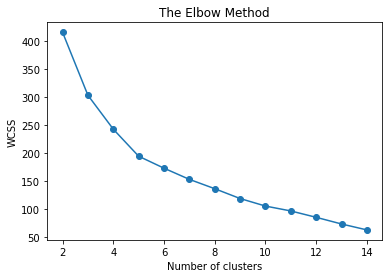

In [100]:
# Encontrar el número de clusters para ello utilizamos el método Elbow.
#Este encuentra el valor óptimo de un hiperparámetro.Nos quedaremos con el número de clusters para el cual la mejora deja de ser sustancial 
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 12)
    kmeans.fit(porteros_norm)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(2, 15), wcss,'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
#Vamos a utilizar k-means creando 3 cluster y veremos los centroides y la información de cada cluster
import warnings
warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42).fit(porteros_norm)
porteros_norm['cluster'] = kmeans.labels_

centers2 = pd.DataFrame(kmeans.cluster_centers_)
centers2['freq']=porteros_norm['cluster'].value_counts()
centers2['freq_r']=porteros_norm['cluster'].value_counts(normalize=True)
print(centers2)

          0         1         2         3         4         5         6  \
0  0.261421  1.236796  1.236197  1.216770  1.038268  0.587859 -0.320256   
1 -0.565345 -0.988860 -0.999543 -0.906965 -0.918857 -0.904933 -0.320256   
2  0.391963  0.078663  0.083237 -0.068912  0.201966  0.311416 -0.320256   
3  0.239664 -0.457076 -0.443114 -0.514396 -0.255387  0.911297  3.122499   
4 -0.115700 -1.175382 -1.144916 -0.829738 -1.233949 -1.004452 -0.320256   

          7         8         9        10        11            12   13  freq  \
0 -0.314240  0.507959  0.326612  1.063931 -0.232725  1.000000e+00  1.0    14   
1  0.465826 -0.209669  0.054627 -0.737519 -0.407851 -2.220446e-16  4.0    14   
2 -0.046873  0.288936  0.228807 -0.095805  0.246322  2.000000e+00  0.0     9   
3  0.685302 -0.469696 -0.148125 -0.529328  1.995958  4.000000e+00  2.0     4   
4 -2.220774 -2.448852 -3.402052 -0.795107 -0.616334  3.000000e+00  3.0     2   

     freq_r  
0  0.325581  
1  0.325581  
2  0.209302  
3  0.093023 

In [105]:
#Utilizamos ahora la tecnica de silhouette para poder evaluar nuestra tecnica.
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
porteros['S_S'] = silhouette_samples(porteros_norm,porteros_norm['cluster'])
silhouette_score_mean = silhouette_score(porteros_norm,porteros_norm['cluster'])
print(silhouette_score_mean)

0.36139139145867916


In [106]:
porteros['cluster']=kmeans.labels_
Centers_mean=porteros.groupby('cluster').mean()
Centers_mean['freq']=porteros['cluster'].value_counts()
Centers_mean['freq_r']=porteros['cluster'].value_counts(normalize=True)
Centers_mean

,age,minutes_played_overall,appearances_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,cards_per_90_overall,S_S,cluster_hc,S_S_hc,freq,freq_r
cluster,,,,,,,,,,,,,,,,,
0,29.357143,3182.500000,35.428571,12.357143,36.571429,2.285714,0.0,1.030000,93.000000,89.857143,1881.571429,0.065714,0.429680,2.0,0.429680,14,0.325581
1,25.285714,310.214286,3.571429,0.571429,5.071429,0.142857,0.0,1.451429,70.428571,85.928571,58.285714,0.035714,0.387198,1.0,0.387198,14,0.325581
2,30.000000,1687.888889,19.000000,5.222222,23.111111,1.888889,0.0,1.174444,86.111111,88.444444,707.777778,0.147778,0.261959,0.0,0.261959,9,0.209302
3,29.250000,996.500000,11.500000,2.750000,15.750000,2.750000,1.0,1.570000,62.250000,83.000000,269.000000,0.447500,0.271125,3.0,0.271125,4,0.093023
4,27.500000,69.500000,1.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,36.000000,0.000000,0.000000,0.330702,4.0,0.330702,2,0.046512


In [107]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
y_hc=hc.fit_predict(porteros_norm)
porteros['cluster_hc']=y_hc
porteros_norm['cluster_hc']=y_hc
porteros['S_S_hc'] = silhouette_samples(porteros_norm,porteros_norm['cluster_hc'])
silhouette_score_mean_hc = silhouette_score(porteros_norm,porteros_norm['cluster_hc'])
print(silhouette_score_mean_hc)


0.44488202579999087


In [108]:
Centers_mean_hc=porteros.groupby('cluster_hc').mean()
Centers_mean_hc['freq_hc']=porteros['cluster_hc'].value_counts()
Centers_mean_hc['freq_r_hc']=porteros['cluster_hc'].value_counts(normalize=True)
Centers_mean_hc=Centers_mean_hc.drop(['cluster','S_S'], axis=1)
Centers_mean_hc

,age,minutes_played_overall,appearances_overall,clean_sheets_overall,conceded_overall,yellow_cards_overall,red_cards_overall,conceded_per_90_overall,min_per_conceded_overall,min_per_match,min_per_card_overall,cards_per_90_overall,S_S_hc,freq_hc,freq_r_hc
cluster_hc,,,,,,,,,,,,,,,
0,25.500000,244.642857,2.857143,0.571429,3.285714,0.285714,0.0,1.351429,79.285714,85.642857,70.500000,0.073571,0.492430,14,0.325581
1,29.357143,3182.500000,35.428571,12.357143,36.571429,2.285714,0.0,1.030000,93.000000,89.857143,1881.571429,0.065714,0.468806,14,0.325581
2,29.250000,996.500000,11.500000,2.750000,15.750000,2.750000,1.0,1.570000,62.250000,83.000000,269.000000,0.447500,0.238802,4,0.093023
3,27.500000,69.500000,1.500000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,36.000000,0.000000,0.000000,0.292628,2,0.046512
4,29.666667,1789.888889,20.111111,5.222222,25.888889,1.666667,0.0,1.330000,72.333333,88.888889,688.777778,0.088889,0.459129,9,0.209302


In [109]:
#variables que representan mayormente a mis variables del modelo de dato
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
pca_por=pca.fit_transform(porteros_norm_2)
pca_por_df=pd.DataFrame(data=pca_por, columns=['Componente_1','Componente_2'])
pca_por_df_def=pd.concat([pca_por_df,porteros_norm[['cluster_hc']]],axis=1)
#Midfielder_norm['PCA1']=pca_mid_df_def['Componente_1']
#Midfielder_norm['PCA2']=pca_mid_df_def['Componente_2']
pca_por_df_def

,Componente_1,Componente_2,cluster_hc
0,2.525139,5.153076,2
1,0.841698,2.891832,2
2,2.596490,-1.313321,0
3,-3.274471,-1.276284,1
4,2.282373,-1.024479,0
5,2.258998,0.487146,0
6,-0.417203,0.562879,4
7,-0.824291,0.362650,4
8,-2.999879,0.410891,1
9,3.913920,-1.550000,3


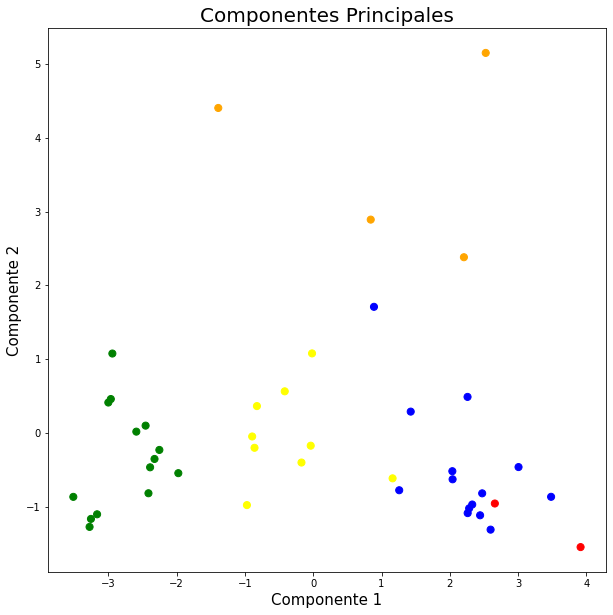

In [110]:
fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot()
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green","orange","red","yellow","blueviolet","aquamarine","brown"])
ax.scatter(x=pca_por_df_def.Componente_1,y=pca_por_df_def.Componente_2, c=color_theme[pca_por_df_def.cluster_hc],s=50)
plt.show()

In [111]:
pca.explained_variance_ratio_*100

array([43.26602597, 16.8050198 ])

In [112]:
model=PCA(n_components=2).fit(porteros_norm_2)
n_pcs = model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
#cuanto más alto sea el valor en valor absoluto, mayor será la influencia de la variable en el componente principal.
delanteros_norm.columns[most_important]
X_train_pca=delanteros_norm_2[porteros_norm_2.columns[most_important]]
X_train_pca.head()

,1,11
0,-0.548686,-0.897762
1,1.028780,0.749635
2,-0.290009,-0.050529
3,-0.385858,-0.144666
4,-1.264666,-1.886201


In [114]:
porteros['full_name']=porteros_aux['full_name']

In [77]:
#porteros['full_name'] = le6.inverse_transform(porteros['full_name'])

In [115]:
porteros.to_csv('cluster_porteros.csv',index = False)